
# Project: Investigate a Dataset (TMDb movies datset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

Question that can analyised from this data set<br>
Movies which had most and least profit<br>
Movies with largest and lowest budgets<br>
Movies with most and least earned revenue<br>
Movies with longest and shortest runtime values<br>
Average runtime of all the movies.<br>
<br>
<br>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
os.chdir("C:/Users/anubh/OneDrive/Documents/Project")

<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

### General Properties

In [29]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb_5000_movies.csv')

#printing first five rows with defined columns of tmdb-movies database
tmdb_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [30]:
tmdb_data.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [31]:
tmdb_data.shape

(4803, 20)

In [32]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [33]:
tmdb_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [34]:
tmdb_data['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
id       2
ro       2
ar       2
cs       2
ta       2
is       1
sl       1
tr       1
no       1
ps       1
ky       1
af       1
vi       1
te       1
pl       1
hu       1
nb       1
el       1
xx       1
Name: original_language, dtype: int64

<b>Observations from Data set </b>

1.There is no currency specified for budget and revenue,I am taking it as in dollars <br>
2.Genres , keywords , production companies ,production countries and spoken language columns are a string which consists of a list of dictionaries<br>
3.Homepage has lots of null values<br>
4.ID is the unique value in the table<br>
5.Original language denotes the langauge of the movies<br>
6.Popularity ,vote average and vote count have no scale defined for it<br>
7.Runtime is in minutes<br>
8.Original title and overview denote the description of the movie




### Data Cleaning (Removing unwanted information from the dataset)

<b>Removing unwanted columns</b>

In [35]:
#creating a list of columb to be deleted
del_col=['genres' , 'id' , 'original_title' , 'spoken_languages' ,  'keywords' ,'status' , 'production_companies' , 'production_countries' , 'overview']

#deleting the columns
tmdb_data= tmdb_data.drop(del_col,1)

#previewing the new dataset
tmdb_data.head(4)

,budget,homepage,original_language,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,http://www.avatarmovie.com/,en,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,http://disney.go.com/disneypictures/pirates/,en,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,http://www.sonypictures.com/movies/spectre/,en,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,http://www.thedarkknightrises.com/,en,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106


<b>Removing duplicates if any :</b>

In [36]:
rows, col = tmdb_data.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 4802 total entries of movies and 11 no.of columns in it.


Now removing duplicates

In [37]:
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 4802 total entries of movies and 11 no.of columns in it.


<b> Removing zeroes from budget and revenue </b>


In [38]:
tmdb_data['budget'].value_counts()

0            1037
20000000      144
30000000      128
25000000      126
40000000      123
15000000      120
35000000      102
10000000      101
50000000      101
60000000       86
5000000        84
12000000       79
8000000        62
70000000       60
80000000       59
18000000       59
6000000        55
7000000        55
2000000        54
45000000       52
3000000        51
4000000        49
1000000        48
75000000       47
55000000       45
28000000       42
100000000      41
150000000      41
11000000       41
13000000       41
             ... 
41677699        1
123000000       1
1650000         1
3700000         1
10200000        1
1488423         1
20500000        1
12899867        1
180000          1
237000000       1
56000           1
325000          1
2280000         1
15300000        1
3100000         1
2540800         1
19500000        1
12516654        1
2627000         1
10284523        1
14200000        1
22000           1
97250400        1
78146652        1
3730500   

In [39]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3228 no.of movies.


<b>4. Changing the release date column into standard date format</b>

In [40]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [41]:
# printing the changed dataset
tmdb_data.head(3)

,budget,homepage,original_language,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000.0,http://www.avatarmovie.com/,en,150.437577,2009-12-10,2.787965e+09,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000.0,http://disney.go.com/disneypictures/pirates/,en,139.082615,2007-05-19,9.610000e+08,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000.0,http://www.sonypictures.com/movies/spectre/,en,107.376788,2015-10-26,8.806746e+08,148.0,A Plan No One Escapes,Spectre,6.3,4466


<b>5. Replacing zero with NAN in runtime column.</b>


In [42]:
tmdb_data.runtime.replace(0 , np.NAN ,inplace = True)

<b>6. Changing format of budget and revenue column.</b><br>
Checking the current format of columns in the dataset

In [43]:
#printing the data type of the data set
tmdb_data.dtypes


budget                      float64
homepage                     object
original_language            object
popularity                  float64
release_date         datetime64[ns]
revenue                     float64
runtime                     float64
tagline                      object
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [44]:
change_type=['budget', 'revenue']
#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
#printing the changed information
tmdb_data.dtypes

budget                        int64
homepage                     object
original_language            object
popularity                  float64
release_date         datetime64[ns]
revenue                       int64
runtime                     float64
tagline                      object
title                        object
vote_average                float64
vote_count                    int64
dtype: object

**7.Creating a new column Profit = Revenue - Budget**

In [45]:
tmdb_data.insert(2, 'Profit' , tmdb_data['revenue'] - tmdb_data['budget'] )

**8.Creating a new column release_year which consists of the Year of release**

In [46]:
tmdb_data['release_year'] = tmdb_data['release_date'].dt.year

<a id='eda'></a>
## Exploratory Data Analysis





### Checking the histogram of all the qualitative variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B104861630>,
      dtype=object)

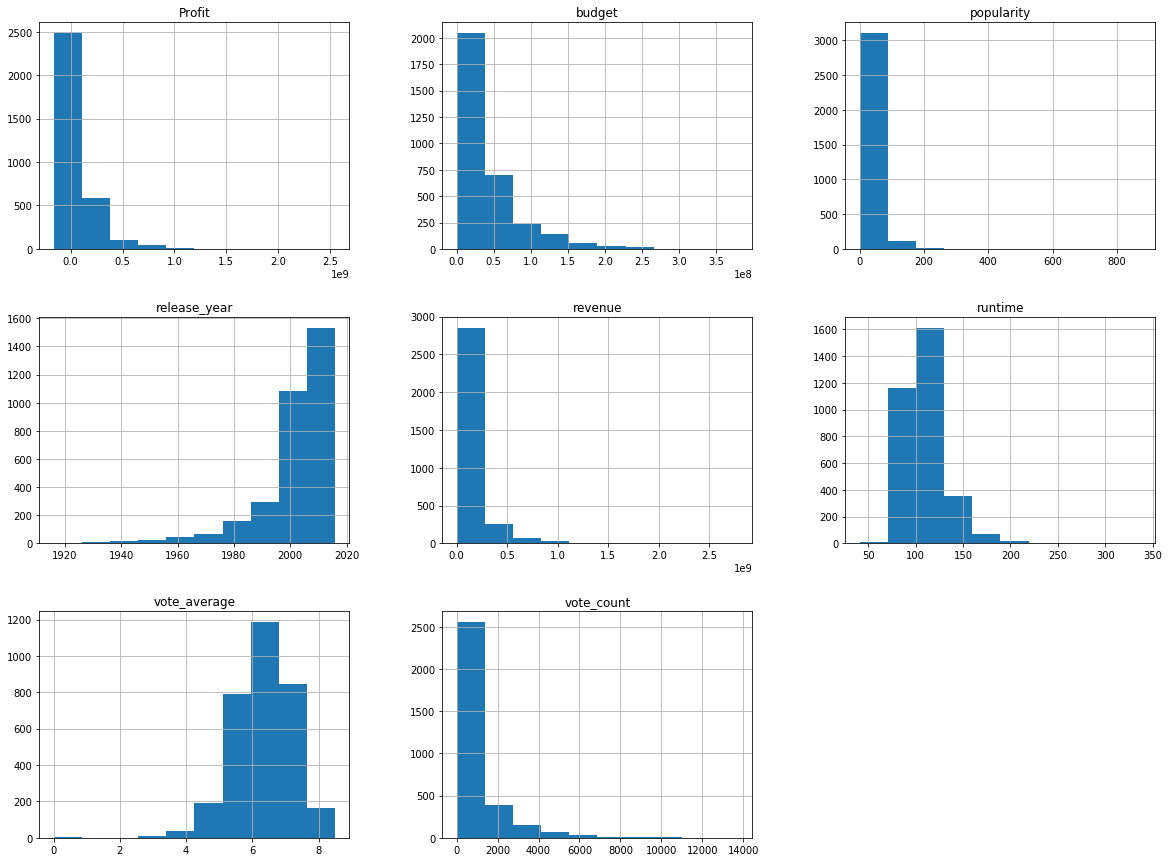

In [74]:
tmdb_data.hist(figsize = (20,15))

It is clear from the above plotted histograms that the data is skewed

### Checking the trend of budget ,revenue and profit over time

Text(0.5, 1.0, 'Budget and Revenue over the years')

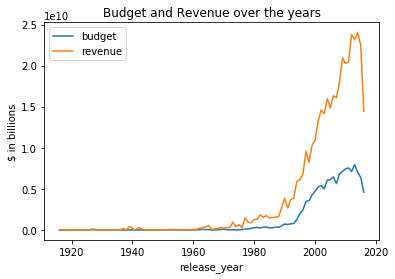

In [88]:
#checking the trend between budget and revenue
tmdb_data.groupby("release_year").sum()[['budget','revenue']].plot()
plt.ylabel("$ in billions")
plt.title("Budget and Revenue over the years")

It can be implied that with passing years the revenue is increasing exponentially with increase in the budgt, but there is a sudden dip in the both teh variables after 2016-2017

Text(0.5, 1.0, 'Profit over the years')

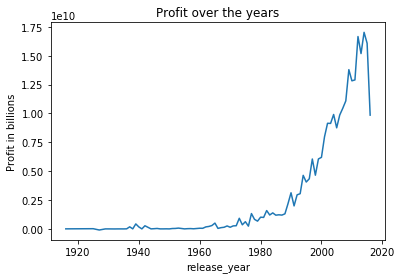

In [87]:
tmdb_data.groupby("release_year").sum()['Profit'].plot()
plt.ylabel("Profit in billions")
plt.title("Profit over the years")

It is evident that the profit from movies was on the rise till 2016-2017 , but there is a sharp dip in the profit after 2016-2017

### Checking minimum and maximum values for various quantitative variables

In [49]:
def calcute_agg(col) :
    high_ind = tmdb_data[col].idxmax()
    high_value = pd.DataFrame(tmdb_data.loc[high_ind])
    
    low_ind = tmdb_data[col].idxmin()
    low_value = pd.DataFrame(tmdb_data.loc[low_ind])

    ans = pd.concat([high_value , low_value] , 1)
    return ans

In [63]:
#Finding movies with maximum and minimum profit
calcute_agg('Profit')

,0,13
budget,237000000,255000000
homepage,http://www.avatarmovie.com/,http://disney.go.com/the-lone-ranger/
Profit,2550965087,-165710090
original_language,en,en
popularity,150.438,49.047
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
revenue,2787965087,89289910
runtime,162,149
tagline,Enter the World of Pandora.,Never Take Off the Mask
title,Avatar,The Lone Ranger


Movie with maxium Profit is : Avatar<br> Movie with minimum Profit is : The Lone Ranger

In [62]:
#Finding movies with maximum and minimum budget
calcute_agg('budget')

,17,4238
budget,380000000,1
homepage,http://disney.go.com/pirates/index-on-stranger...,NaN
Profit,665713802,8499999
original_language,en,en
popularity,135.414,28.2765
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136,87
tagline,Live Forever Or Die Trying.,He stands alone as the greatest entertainer of...
title,Pirates of the Caribbean: On Stranger Tides,Modern Times


Movie with maxium Budget is : Pirates of the Caribbean: On Stranger Tides<br> Movie with minimum Budget is : Modern Times

In [65]:
#Finding movies with maximum and minimum revenue
calcute_agg('revenue')

,0,3372
budget,237000000,7
homepage,http://www.avatarmovie.com/,NaN
Profit,2550965087,-2
original_language,en,en
popularity,150.438,4.85703
release_date,2009-12-10 00:00:00,1992-05-01 00:00:00
revenue,2787965087,5
runtime,162,90
tagline,Enter the World of Pandora.,He's seen the future. Now he has to kill it.
title,Avatar,Split Second


Movie with maxium Revenue is : Avatar<br> Movie with minimum Revenue is : Split Second

In [66]:
#Finding movies with maximum and minimum runtime
calcute_agg("runtime")

,2384,3626
budget,18000000,5000000
homepage,NaN,NaN
Profit,-17128721,-925977
original_language,en,en
popularity,1.13838,4.49837
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
revenue,871279,4074023
runtime,338,41
tagline,The man who hijacked the world,The T-Rex of the Seas come alive.
title,Carlos,Sea Rex 3D: Journey to a Prehistoric World


Movie with maxium Runtime is : Carlos	<br> Movie with minimum Revenue is : Sea Rex 3D: Journey to a Prehistoric World

<b> Plotting the Runtime of all the movies </b>

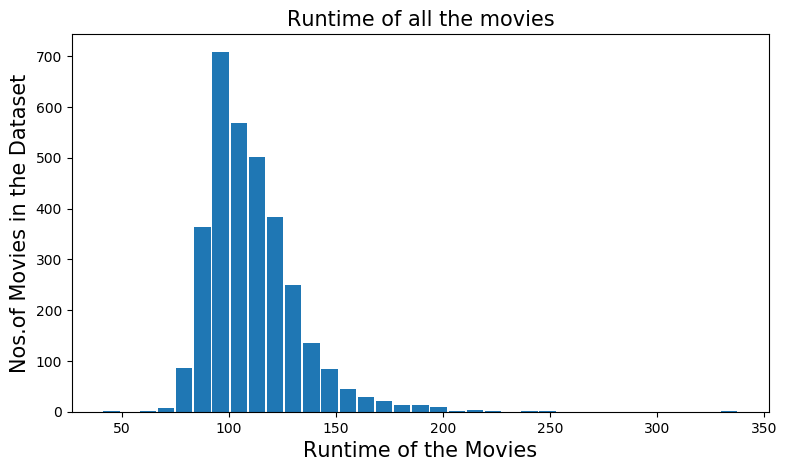

In [54]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The average runtime for all the movies is around 95-105 minutes

<b> Checking Top 5 values for all the qualitative variables

In [55]:
def top_f(col) :
    ff = tmdb_data.sort_values(col ,ascending= False)[:5]
    return ff

Text(0, 0.5, 'Profit in billions')

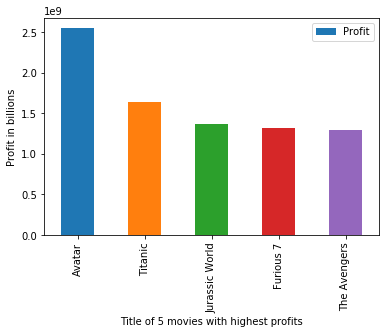

In [89]:
#checking top 5 movies with maximum profit
top_f('Profit').plot.bar('title' , 'Profit')
plt.xlabel("Title of 5 movies with highest profits")
plt.ylabel("Profit in billions")

Text(0, 0.5, 'Revenue in billions')

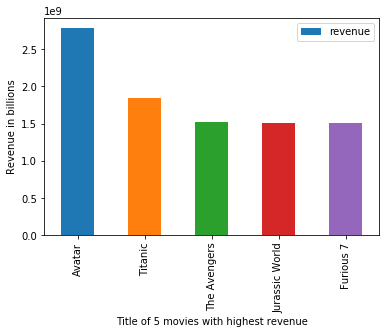

In [90]:
#checking top 5 movies with maximum revenue
top_f('revenue').plot.bar('title' , 'revenue')
plt.xlabel("Title of 5 movies with highest revenue")
plt.ylabel("Revenue in billions")

Text(0, 0.5, 'Budget in billions')

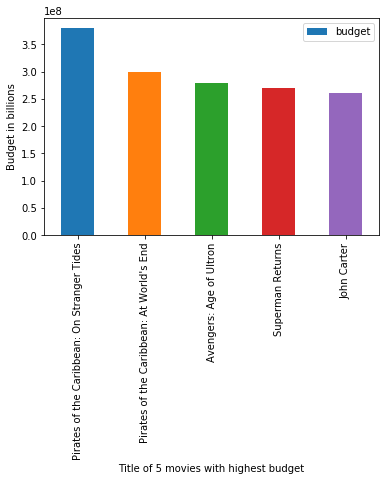

In [91]:
#checking top 5 movies with maximum budget
top_f('budget').plot.bar('title' , 'budget')
plt.xlabel("Title of 5 movies with highest budget")
plt.ylabel("Budget in billions")

Text(0, 0.5, 'Run time in minutes')

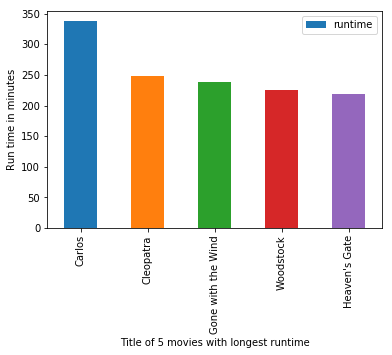

In [92]:
#checking top 5 movies with maximum runtime
top_f('runtime').plot.bar('title' , 'runtime')
plt.xlabel("Title of 5 movies with longest runtime")
plt.ylabel("Run time in minutes")

<a id='conclusions'></a>
## Conclusions

It was a good data to start my Data analysis journey on Udacity Nanodegree<br>
Below are some are the conclusions that I drew from this dataset :<br>
1.Most of the data is skewed to the right<br>
2.Revenue and Profit has kept on increasing but there is a sudden dip in budget post 2015 which is resulting in a sharp dip in profit and revenue.<br>
3.All time highest profit making movie as per the data is "Avatar<br>
4.The movie with highest budget is "Pirates of the Carribean"<br>
5.The movie with highest revenue is "Avatar"<br>
6.The average runtime of movies is around 100 minutes<br>

**Limitations**<br>
I doubt the accuracy of the data.There are some columns like revenue and budget in which the amount is in negative values, which is highly unlikely.Moreover we are not sure if the data provided to us is completely corect and up-to-date. The budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.